In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path_csv = r'C:\Users\rocks\Desktop\nasscom hackathon\warangal.csv'

In [4]:
warangal = pd.read_csv(path_csv, index_col='Dates', parse_dates=True)

In [5]:
warangal.head()

,S02,NOX,PM10,NH3,AQI
Dates,,,,,
Jan-16,7.0,26.0,76,22,76
Feb-16,7.0,19.0,72,21,72
Mar-16,7.1,21.8,63,24,63
Apr-16,7.0,20.0,73,21,73
May-16,8.0,19.0,84,21,84


In [6]:
warangal_nox = warangal.drop(['S02', 'PM10', 'NH3', 'AQI'], axis=1)

In [7]:
warangal_nox

,NOX
Dates,
Jan-16,26.0
Feb-16,19.0
Mar-16,21.8
Apr-16,20.0
May-16,19.0
...,...
Aug-22,26.6
Sep-22,29.9
Oct-22,32.2


In [8]:
train = warangal_nox.iloc[:72]
test = warangal_nox.iloc[72:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [11]:
scaled_train[:20]

array([[0.18918919],
       [0.        ],
       [0.07567568],
       [0.02702703],
       [0.        ],
       [0.08108108],
       [0.02702703],
       [0.24324324],
       [0.02702703],
       [0.08108108],
       [0.08108108],
       [0.2972973 ],
       [0.16216216],
       [0.21621622],
       [0.21621622],
       [0.24324324],
       [0.21621622],
       [0.12432432],
       [0.18918919],
       [0.08108108]])

In [12]:
from numpy import array

In [13]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [14]:
raw_seq = scaled_train

In [15]:
len(raw_seq)

72

In [16]:

n_steps =12
X, y = split_sequence(raw_seq, n_steps)

In [17]:
X.shape

(60, 12, 1)

In [18]:
n_features = 1
n_seq = 4
n_steps = 3
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [19]:
X[0]

array([[[0.18918919],
        [0.        ],
        [0.07567568]],

       [[0.02702703],
        [0.        ],
        [0.08108108]],

       [[0.02702703],
        [0.24324324],
        [0.02702703]],

       [[0.08108108],
        [0.08108108],
        [0.2972973 ]]])

In [20]:
X

array([[[[0.18918919],
         [0.        ],
         [0.07567568]],

        [[0.02702703],
         [0.        ],
         [0.08108108]],

        [[0.02702703],
         [0.24324324],
         [0.02702703]],

        [[0.08108108],
         [0.08108108],
         [0.2972973 ]]],


       [[[0.        ],
         [0.07567568],
         [0.02702703]],

        [[0.        ],
         [0.08108108],
         [0.02702703]],

        [[0.24324324],
         [0.02702703],
         [0.08108108]],

        [[0.08108108],
         [0.2972973 ],
         [0.16216216]]],


       [[[0.07567568],
         [0.02702703],
         [0.        ]],

        [[0.08108108],
         [0.02702703],
         [0.24324324]],

        [[0.02702703],
         [0.08108108],
         [0.08108108]],

        [[0.2972973 ],
         [0.16216216],
         [0.21621622]]],


       [[[0.02702703],
         [0.        ],
         [0.08108108]],

        [[0.02702703],
         [0.24324324],
         [0.02702703]],



In [21]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [22]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [23]:
model.fit(X, y, epochs=500)

Epoch 1/500
2/2 [==============================] - 2s 15ms/step - loss: 0.3101
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 0.2720
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 0.2353
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 0.2011
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 0.1694
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 0.1399
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1137
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 0.0885
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 0.0664
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0516
Epoch 11/500
2/2 [==============================] - 0s 6ms/step - loss: 0.0399
Epoch 12/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0353
Epoch 13/500
2/2 [==============================] - 0s 8ms/

In [35]:
model.save('models/CNN_LSTM')

INFO:tensorflow:Assets written to: models/CNN_LSTM\assets


INFO:tensorflow:Assets written to: models/CNN_LSTM\assets


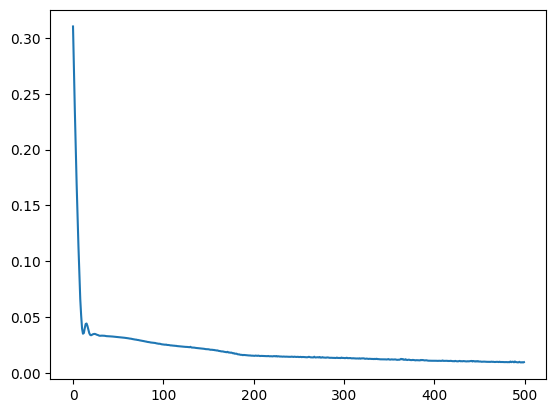

In [24]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)


In [25]:
loss_per_epoch[-1]

0.00978890247642994

In [26]:
last_train_batch = scaled_train[-12:]

In [27]:
last_train_batch = last_train_batch.reshape((1, n_seq, n_steps, n_features))

In [28]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 268ms/step


array([[0.5453181]], dtype=float32)

In [29]:
scaled_train[-12:]

array([[0.62702703],
       [0.76756757],
       [0.46756757],
       [0.40540541],
       [0.35135135],
       [0.31891892],
       [0.26216216],
       [0.37027027],
       [0.32972973],
       [0.36486486],
       [0.41351351],
       [0.32432432]])

In [30]:
test_predictions = []

first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1, n_seq, n_steps, n_features))

for i in range(len(scaled_test)):
    current_prediction = model.predict(current_batch)[0]

    test_predictions.append(current_prediction)
    current_batch = current_batch.reshape((1, n_seq*n_steps, n_features))
    current_batch = np.append(current_batch[:, 1:, :],[[current_prediction]], axis =1)
    current_batch = current_batch.reshape((1, n_seq, n_steps, n_features))

1/1 [==============================] - 0s 29ms/step


In [31]:
true_predictions = scaler.inverse_transform(test_predictions)

In [32]:
test['Predictions']= true_predictions

C:\Users\rocks\AppData\Local\Temp\ipykernel_8264\715416204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']= true_predictions


In [33]:
test

,NOX,Predictions
Dates,,
Jan-22,31.8,39.176771
Feb-22,31.0,40.080364
Mar-22,33.1,42.618390
Apr-22,34.2,42.579271
May-22,34.2,45.578747
Jun-22,34.7,43.071453
Jul-22,30.2,46.823364
Aug-22,26.6,45.011560
Sep-22,29.9,48.469634


<AxesSubplot: xlabel='Dates'>

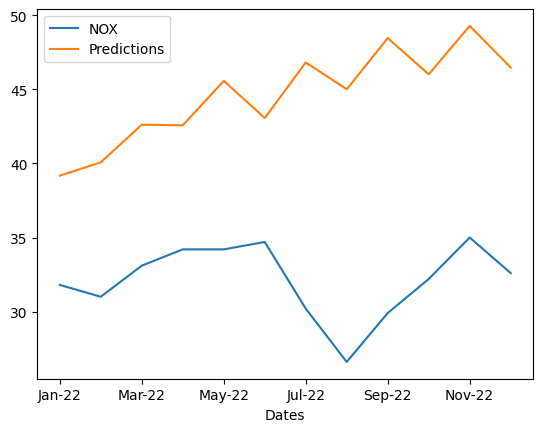

In [34]:
test.plot()

In [100]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['NOX'], test['Predictions']))
rmse

4.728997749821084

In [ ]:
""